# Demonstrate some basic linear model, and tune it.

In [1]:
%matplotlib inline

In [48]:
from numpy.random import random
from matplotlib import pyplot as plt, animation
import numpy as np
from IPython.display import HTML

In [3]:
def lin(a, b, x): return a*x + b

In [4]:
lin(1, 1, 0)

1

In [5]:
a = 3.
b = 8. # Note the use of the decimal places to mark these as floats.

In [6]:
n = 30
x = random(n)
y = lin(a,b,x)

In [7]:
x

array([ 0.32660225,  0.85916867,  0.19612388,  0.6134003 ,  0.73054441,
        0.33341656,  0.12312117,  0.42864652,  0.88728003,  0.38613053,
        0.71728508,  0.77952704,  0.28962022,  0.55987877,  0.94243673,
        0.00832879,  0.31047328,  0.18190157,  0.09316949,  0.82851771,
        0.53370547,  0.99539484,  0.86071197,  0.57451031,  0.96964272,
        0.22727702,  0.711865  ,  0.19445371,  0.10986658,  0.4155403 ])

In [8]:
y

array([  8.97980675,  10.57750601,   8.58837164,   9.8402009 ,
        10.19163322,   9.00024967,   8.36936351,   9.28593956,
        10.66184009,   9.15839158,  10.15185524,  10.33858111,
         8.86886067,   9.67963631,  10.82731018,   8.02498636,
         8.93141983,   8.5457047 ,   8.27950846,  10.48555313,
         9.60111641,  10.98618453,  10.58213592,   9.72353094,
        10.90892816,   8.68183105,  10.135595  ,   8.58336113,
         8.32959973,   9.24662089])

Note that the above demonstrates the flexibility of Python and the advantage of using NumPy arrays!

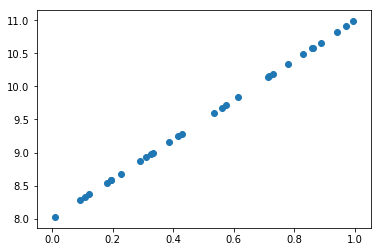

In [9]:
plt.scatter(x,y)

## Define our loss functions

In [10]:
def sse(y, y_pred): return ((y-y_pred)**2).sum()  # Sum of squared errors
def loss(y, a, b, x): return sse(y, lin(a, b, x))
def avg_loss(y, a, b, x): return np.sqrt(loss(y, a, b, x)/n)

Questions:

* Which of the above functions are for single points and which are array-wise? Is there really a difference?
* Why do we have a 'loss' and 'avg_loss' function?

In [41]:
a_guess = -1.
b_guess = 0.

In [42]:
avg_loss(y, a_guess, b_guess, x)

10.095383064785864

In [43]:
lr = 0.01

How does our optimisation work here?

~~~~
d[(y-(a*x+b))**2,b] = 2 ( b + ax - y) = 2 (y_pred - y)
d[(y-(a*x+b))**2,a] = 2 x (b + ax - y) = x * dy/db
~~~~


In [44]:
def update():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [45]:
update()

In [46]:
a_guess

-0.89142175527501188

In [47]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x, y)
line, = plt.plot(x, lin(a_guess,b_guess, x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(10): update()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 50), interval=100)
HTML(ani.to_html5_video())

In [40]:
??plt.plot